# Quantitative Trading Toolbox (1) --- The Sharpe Ratio

__To learn more, join us here:__
#### [Quantitative Trading Like a Pro: Essential Python Course](https://www.udemy.com/course/python-for-traders-and-investors/?referralCode=D26278FF40FCB735C68C)

#### [Back to the Futures: Futures Trading 101](https://www.udemy.com/course/back-to-the-futures/?referralCode=8C9EDF0AFCC33A25F7B0)

__Coupon codes can be found [here](http://aaaquants.com/courses/):__ 

In [1]:
import numpy as np
import pylab as plt

In [2]:
# This is the number of trading days in a year
T = 256

# Here we create a set of normally distributed random returns
# and we are adding a small amount of randomness
ret_a = np.ones(T)/T+np.random.randn(T)*0.001 

# Creating a price series, strictly speaking we should use cumprod but
# this is a bit better for illustration
a = np.cumsum(ret_a)  

# Creating a step-series
ret_b = np.random.randn(T)*0.001
ret_b[75] = -0.5
ret_b[150] = 1.5
b = np.cumsum(ret_b)

Text(0,0.5,'PnL')

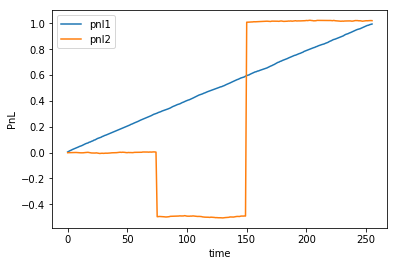

In [3]:
# Plot Pnls
plt.plot(a,label='pnl1')
plt.plot(b,label='pnl2')
plt.legend();
plt.xlabel('time')
plt.ylabel('PnL')

### Risk-adjusted Returns

In [4]:
# Calculate risk-adjusted returns
adj_ret_a = np.mean(ret_a)/np.std(ret_a)
adj_ret_a

4.140094558643989

In [5]:
# Calculate risk-adjusted returns
adj_ret_b = np.mean(ret_b)/np.std(ret_b)
adj_ret_b

0.04039547045690596

In [6]:
# Create random PnL that finishes at 1
np.random.seed(80)
while True:
  ret_c = np.random.randn(T)*0.03
  if np.abs(sum(ret_c)-1)<0.01:
    break

Text(0,0.5,'PnL')

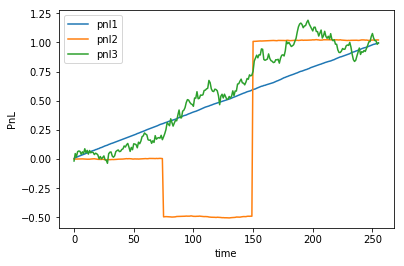

In [7]:
# Plot with random PnLs
plt.plot(a,label='pnl1')
plt.plot(b,label='pnl2')
plt.plot(np.cumsum(ret_c),label='pnl3')
plt.legend();
plt.xlabel('time')
plt.ylabel('PnL')

In [8]:
# Calculate risk-adjusted returns of random PnL
adj_ret_c = np.mean(ret_c)/np.std(ret_c)
adj_ret_c

0.12912301070989737

In [9]:
# Calculate Annualised Risk Adjusted Return
ann_ret_c = adj_ret_c * np.sqrt(T)
ann_ret_c

2.065968171358358

In [10]:
# Or 
ann_ret_c = adj_ret_c * 16
ann_ret_c

2.065968171358358

In [11]:
np.mean(ret_c)

0.0038907860647559266

In [12]:
irate = 0.05
Sharpe_c = np.mean(ret_c-(irate/365))/np.std(ret_c)*16
Sharpe_c

1.9932298265015596

### Sharpe ratio for different time frames

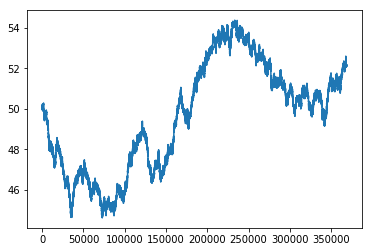

In [13]:
# Creating a series of minutely returns for one year
np.random.seed(86)
ret_d = np.random.randn(T*24*60)*0.01
plt.plot(np.cumsum(ret_d)+50)

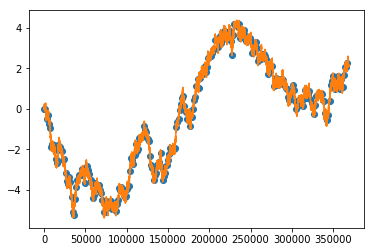

In [14]:
# Create daily prices from minutely prices
daily = np.cumsum(ret_d)[::24*60]
plt.plot(np.arange(T)*24*60,daily,'o')
plt.plot(np.cumsum(ret_d))

In [15]:
# Sharpe of the minutely series:
np.mean(ret_d)/np.std(ret_d)*np.sqrt(T*24*60)

0.35296875329764565

In [16]:
# Sharpe of the daily series:
np.mean(np.diff(daily)/daily[:-1])/np.std(np.diff(daily)/daily[:-1])*np.sqrt(T)

1.3176561057903977